# Data Science Project @Sparks Foundation (GRIP June21)

### Task-1 Score prediction using Supervised ML

### Author -  keerthi sai Jahnavi 




In [10]:
# Importing necessary Libraries

import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt


#### Importing Data set

In [14]:
data = pd.read_csv("/content/sample_data/student_scores - student_scores.csv")

# Reading first 10 data entries
data.head(11)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Understanding the Data set 

In [15]:
print(f"Shape of data     {data.shape}")

Shape of data     (25, 2)


In [16]:
print(f"Total no of values in each column:- \n{data.count()}")

Total no of values in each column:- 
Hours     25
Scores    25
dtype: int64


In [18]:
print(f"Data desciption \n{data.describe()}")

Data desciption 
           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


#### Saving Hours and Scores data in 2D Arrays X and Y

In [25]:
x= np.array(data['Hours']).reshape(-1, 1)
y = np.array(data['Scores']).reshape(-1,1)

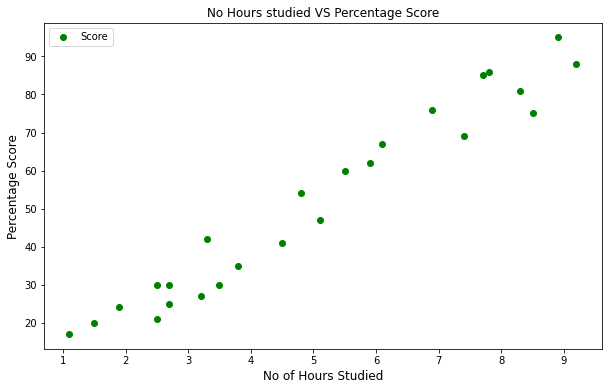

In [26]:
# Plotting Distribution of Hours and Scores

plt.figure(figsize=(10,6))
plt.title("No Hours studied VS Percentage Score", fontsize="large")
plt.scatter(x, y, color='green', label= 'Score')
plt.xlabel("No of Hours Studied", fontsize= "large")
plt.ylabel("Percentage Score", fontsize= "large")
plt.legend()
plt.show()

In [27]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


High correlation coeffiecient and the above plot show that hours and scores have linear relationship. So we use linear regression model to estimate the percentage score.
Linear Regression Equation is: Y = a + bX, where X is the explanatory variable and Y is the dependent variable. 
The slope of the line is b, and a is the intercept (the value of y when x = 0).

### Splitting Data into Training and Testing Set

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(x, y, test_size=0.33, random_state=42)
print("Data is successfully Splitted")

Data is successfully Splitted


### Training Data

In [30]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

print("Training Completed")


Training Completed


In [31]:
print('Intercept value is:',model.intercept_)
print('Linear coefficient is:',model.coef_)

Intercept value is: [3.40503018]
Linear coefficient is: [[9.65029083]]


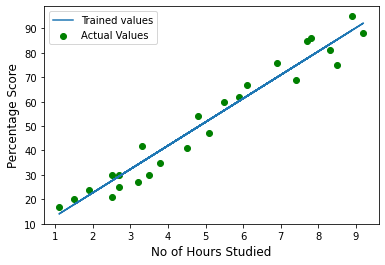

In [43]:
#Fittig data into regression line

line = model.coef_*x + model.intercept_
plt.scatter(x,y, color="green", label="Actual Values")
plt.plot(x, line, label="Trained values")
plt.xlabel("No of Hours Studied", fontsize= "large")
plt.ylabel("Percentage Score", fontsize= "large")
plt.legend()
plt.show()

### Predicting Score using the Model

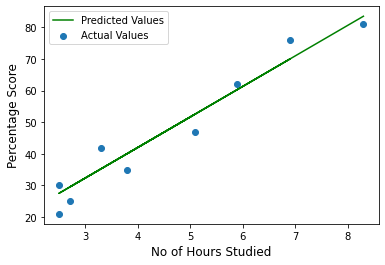

In [44]:
# Predicting Model Score based on Test Data Set

y_pred = model.predict(x_test)

# plotting actual v/s Predicted values
plt.plot(x_test, y_pred, color="green", label='Predicted Values')

plt.scatter(x_test, y_test, label='Actual Values')
plt.xlabel("No of Hours Studied", fontsize= "large")
plt.ylabel("Percentage Score", fontsize= "large")

plt.legend()

plt.show()


### Testing & Prediction Score for 9.25 hrs/ day study

In [45]:
hours= [[9.25]]
pred_score = model.predict(hours)
print(f"Number of hours = {hours}")  
print(f"Prediction Score = {pred_score}")

Number of hours = [[9.25]]
Prediction Score = [[92.67022038]]


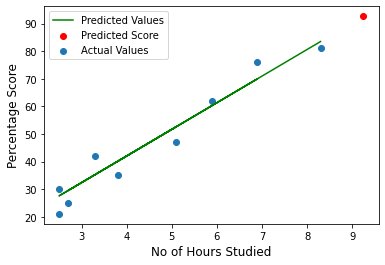

In [46]:
# Plotting predicted value on the graph

plt.plot(x_test, y_pred, color="green", label='Predicted Values')
plt.scatter(hours, pred_score, marker ='o', c='r', label='Predicted Score')
plt.scatter(x_test, y_test, label='Actual Values')
plt.xlabel("No of Hours Studied", fontsize= "large")
plt.ylabel("Percentage Score", fontsize= "large")
plt.legend()
plt.show()

###### Evaluating Model Using  r squared score (Coefficient of determination)



In [53]:
# Calculation of model score
model.score(x_test,y_test)

0.9435488190277577

Interpretation :- 94.35% variation in dependent variable(Scores) are explained by independent variable(Hours) in the model.

### Conclusion
#### For a student studying 9.25Hrs a day , the model predicts his score as 92.67022
